<a href="https://colab.research.google.com/github/HDWilliams/CIFAR10-Classifier/blob/master/Cifar10_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#import necessary libraries
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms

#import CIFAR10 dataset

#set up transform
transform = transforms.Compose([transforms.ToTensor(), 
                                transforms.Normalize((.5, .5, .5), (.5, .5, .5))])

#import dataset/apply transforms
train_data = datasets.CIFAR10('data', train=True, download=True, transform=transform)

#set up validation set
validation_percentage = .2
train_len = len(train_data)
indicies = list(range(train_len))
split = int(np.floor(validation_percentage * train_len))
train_index, validation_index = indicies[split:], indicies[:split]

train_sample, valid_sample = torch.utils.data.SubsetRandomSampler(train_index), torch.utils.data.SubsetRandomSampler(validation_index)
test_data = datasets.CIFAR10('data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_data, batch_size=20, sampler=train_sample, num_workers = 0)
valid_loader = torch.utils.data.DataLoader(train_data, batch_size=20, sampler=valid_sample, num_workers = 0)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=20, sampler=train_sample, num_workers = 0)

Files already downloaded and verified
Files already downloaded and verified


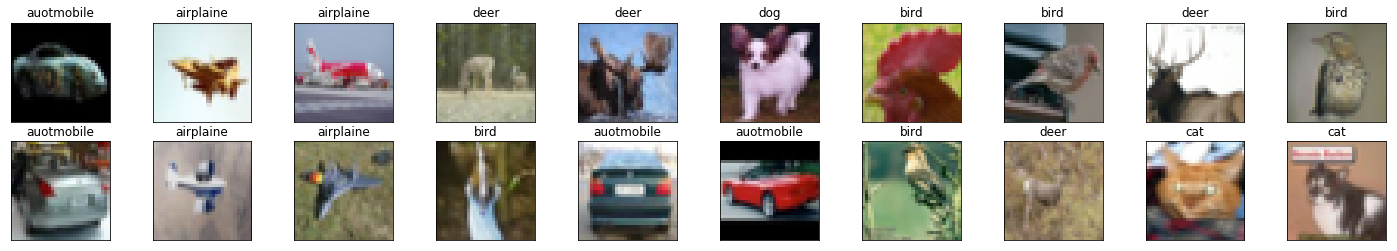

In [6]:
#Visualize Images
def view_images(img):
  img = img/2+.5
  plt.imshow(np.transpose(img, (1, 2, 0)))
  
classes = ['airplaine', 'auotmobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

#make iterator 
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy()

fig = plt.figure(figsize=(25,4))
for idx in np.arange(20):
  ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
  view_images(images[idx])
  ax.set_title(classes[labels[idx]])

In [7]:
#set up GPU training
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [0]:
#Define CNN
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
  def __init__(self):
    super().__init__()
    
    #conv layer
    self.conv1 = nn.Conv2d(3, 16, 3)
    
    #pooling layer, reduces size by half
    self.pool1 = nn.MaxPool2d(2,2)
    
    #fully connected layer
    
    self.fc1 = nn.Linear(16*16*16, 10)
    
  def forward(self, x):
    out = self.pool1(F.relu(self.conv1(x)))
    # flatten image input
    print(out.shape)
    out = out.view(-1, 16 * 16 * 16)
    self.fc1(out)
    return out

model = CNN()
model = model.to(device)

In [0]:
#Set up optimizer and loss criterion, use CrossEntropyLoss for multiclass classification
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = .01)


In [30]:
#train model
epochs = 20
for epoch in range(epochs):
  running_loss = 0
  for images, labels in train_loader:
    optimizer.zero_grad()
    #images = images.view(images.shape[0], -1)
    images, labels = images.to(device), labels.to(device)
    
    output = model(images)
    print(output.shape)
    loss = criterion(output, labels)
    loss.backward()
    optimizer.step
    
    running_loss += loss.item()
  print('Loss: ', running_loss/len(train_loader))

torch.Size([20, 16, 15, 15])


RuntimeError: ignored